<center>

## Гипотезы
    
</center>

In [1]:
from scipy.stats import mannwhitneyu

In [2]:
from scipy.stats import ttest_1samp, ttest_ind, chisquare, f_oneway

In [3]:
import numpy as np
import pandas as pd

import scipy.stats as sts
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import levene
from scipy.stats import kruskal
import warnings
warnings.filterwarnings("ignore")

__На основе визуализаций наших данных и логических рассуждений были сформулированы следующие гипотезы:__
1) Средний рейтинг фильмов с возрастным ограничением 0+ и 6+ в России и СССР больше 8.5 (значение было выбрано после просмотра среза таблицы по указанным условиям).

2) Средняя продолжительность фильмов в Великобритании примерно равна средней во Франции (критерий выбора стран зависел от однородности выборок, для Франции и Великобритании кол-во наблюдений почти одинаково, что позволяет нам протестировать гипотезу продолжительности на них).

3) Разброс рейтинга фильмов c 2000гг. в Канаде равен разбросу в Германии (выбор стран вновь зависел от кол-ва фильмов выпущенных после 2000гг. для большей релевантности).

4) Средняя продолжительность фильмов во всех странах для возрастного ограничения 12+ имеет то же значение, что и для 18+.  (критерий выбора условий всё тот же).

5) Средний рейтинг фильмов, выпущенных до 2016гг., равен среднему после 2016г.

Для проверки гипотез будем использовать уровень значимости $5\%$.

Теперь загрузим наш Датасет, обработанный после EDA и с новыми признаками.

In [4]:
df = pd.read_csv('project_new_feature_year_class.csv')
df

,Название,Страна,Жанр,Год выпуска,Давность,Возрастное ограничение,Категория,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,0,6,Детское,89,8.4
1,Беспринципные в деревне,Россия,Комедии,2023,0,18,Взрослое,86,7.2
2,Нюрнберг,Россия,Драмы,2023,0,12,Подростковое,124,8.1
3,Моё прекрасное несчастье,США,Комедии,2023,0,18,Взрослое,91,7.7
4,Взломщик,США,Криминал,2023,0,18,Взрослое,91,6.5
...,...,...,...,...,...,...,...,...,...
2056,Марионетка,Нидерланды,Триллеры,2020,3,18,Взрослое,107,6.5
2057,Русалка. Озеро мертвых,Россия,Ужасы,2018,5,16,Подростковое,83,5.5
2058,Форсаж 4,США,Криминал,2009,14,16,Подростковое,106,8.8
2059,Полночь на злаковом поле,США,Триллеры,2021,2,16,Подростковое,98,6.7


## Гипотеза №1: Любимые мультики

Мы думаем, что в России умеют создавать хорошие фильмы "Для всей семьи", которые ценятся по всему миру. Поэтому мы решили рассмотреть фильмы с возрастным ограничением 0+ и 6+ за всю историю России (Россия и СССР). Наше предположение основывалось на анализе гистограммы среднего возрастного ограничения по странам в части EDA, потому что в СССР, как оказалось, самое низкое возрастное ограничение.

__Перейдём к рассмотрению 1 гипотезы:__
средний рейтинг фильмов с возрастным ограничением 0+ и 6+ в России и СССР больше 8.5

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu ≥ 8.5 \\
&H_1: \hspace{2mm} \mu < 8.5
\end{aligned}
$$

Изначально посмотрим, как распределены наши значения рейтинга при условии стран и возрастного ограничения.

In [5]:
rus_SU=df[(df['Страна']=='Россия')|(df['Страна']=='СССР')][(df['Возрастное ограничение']==0)|(df['Возрастное ограничение']==6)]
rus_SU

,Название,Страна,Жанр,Год выпуска,Давность,Возрастное ограничение,Категория,Продолжительность,Рейтинг
0,"На солнце, вдоль рядов кукурузы",Россия,Драмы,2023,0,6,Детское,89,8.4
43,Солдатик,Россия,Драмы,2019,4,6,Детское,86,8.6
46,Последний богатырь: Посланник Тьмы,Россия,Фэнтези,2021,2,6,Детское,107,8.4
56,Моя ужасная сестра,Россия,Комедии,2022,1,6,Детское,74,7.9
86,Офицеры (цветная версия),СССР,Советские,1971,52,6,Детское,95,9.0
...,...,...,...,...,...,...,...,...,...
1903,Москва-Кассиопея,СССР,Фантастика,1974,49,6,Детское,79,8.2
1949,Доживем до понедельника,СССР,Мелодрамы,1968,55,0,Детское,100,8.6
2011,Спящая красавица. Легенда двух королевств: Лед...,Россия,спектакли,2020,3,0,Детское,95,7.9
2019,Ёлки Последние,Россия,Комедии,2018,5,6,Детское,92,8.1


Text(0.5, 1.0, 'Распределение рейтинга фильмов в России и СССР (0+ и 6+)')

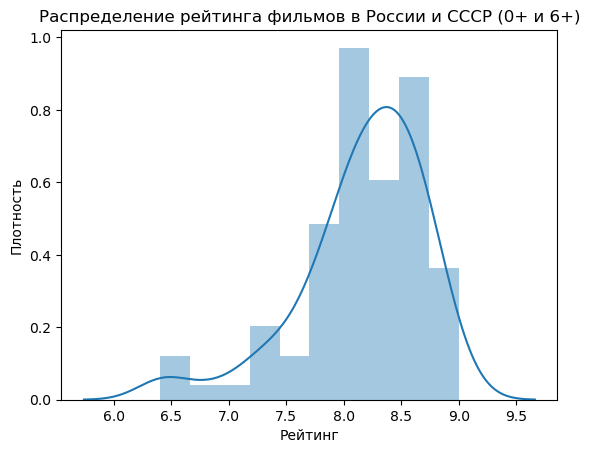

In [24]:
sns.distplot(rus_SU['Рейтинг'])
plt.ylabel("Плотность")
plt.title('Распределение рейтинга фильмов в России и СССР (0+ и 6+)')

Заметим из графика, что распределение скошено, а также присутствуют выбросы, что мешает нам обратиться к z-тестам и t-тестам. Поэтому придётся прибегнуть к непараметрическим тестам. 

Применим тест Уилкоксона на одной выборке, который подходит в случае, если распределение нельзя отнести к нормальному. 

In [7]:
statistic_pvalue=sts.wilcoxon(rus_SU['Рейтинг']-8.5,alternative='less')
statistic_pvalue

WilcoxonResult(statistic=637.0, pvalue=2.998180880127762e-08)

In [8]:
statistic_pvalue[1]>0.05

False

__Вывод:__

Поскольку рассчитанный p-value меньше уровня значимости, отвергаем нулевую гипотезу и считаем, что средний рейтинг фильмов категории 0+ и 6+ за всю историю советского и постсоветсткого кино был меньше 8.5, что в принципе заметно на графике с левосторонней асимметрией и продолжительным хвостом слева, что сдвигает средний рейтинг дальше от 8.5. Однако можем выявить, что, хоть наша гипотеза отверглась, большая часть фильмов нашего производства достаточно высоко оценивается. Хотя это может быть связано с тем, что большая часть российского кинематографа на ИВИ не требует подписки для просмотра, поэтому их может просмотреть и оценить больше людей.

## Гипотеза №2: Кино-кинонема-кинематограф

Тогда перейдём к тестированию следующей гипотезы:  средняя продолжительность фильмов в Великобритании примерно равна средней во Франции. Альтернативная: средняя продолжительность фильмов в Великобритании больше средней во Франции. \
Выбор представленных стран основывался на примерно одинаковом кол-ве данных в выборках.

In [31]:
len(df[df['Страна']=='Великобритания'])

145

In [32]:
len(df[df['Страна']=='Франция'])

118

$$
\begin{aligned}
& H_0: \mu_{UK} = \mu_{France} \\
& H_1: \mu_{UK} > \mu_{France}
\end{aligned}
$$

Снова перед принятием решения о выборе того или иного критерия проверки посмотрим на распределение продолжительности фильмов в указанных странах.

In [9]:
UK_France=df[(df['Страна']=='Великобритания')|(df['Страна']=='Франция')]
UK_France

,Название,Страна,Жанр,Год выпуска,Давность,Возрастное ограничение,Категория,Продолжительность,Рейтинг
15,Горизонт в огне,Франция,Драмы,2022,1,18,Взрослое,134,8.1
18,При чём тут любовь?,Великобритания,Мелодрамы,2022,1,18,Взрослое,104,8.2
29,1+1,Франция,Драмы,2011,12,16,Подростковое,112,9.0
35,Путешественница во времени,Франция,Драмы,2022,1,16,Подростковое,120,7.7
38,Война миров: Вторжение,Великобритания,Фантастика,2023,0,12,Подростковое,83,4.7
...,...,...,...,...,...,...,...,...,...
2015,Овердрайв,Франция,Боевики,2017,6,16,Подростковое,89,7.4
2023,Гнездо,Великобритания,Драмы,2020,3,18,Взрослое,103,5.9
2034,Выжившая,Франция,Триллеры,2017,6,18,Взрослое,108,5.7
2035,Путешествие Гектора в поисках счастья,Великобритания,Комедии,2014,9,16,Подростковое,114,8.0


Text(0.5, 1.0, 'Распределение продолжительности фильмов в Великобритании и Франции')

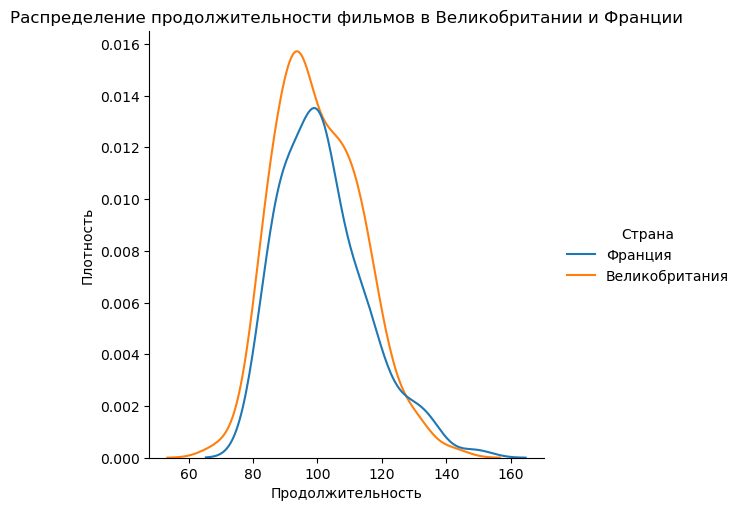

In [25]:
sns.displot(data=UK_France,x='Продолжительность', hue='Страна',kind='kde')
plt.ylabel("Плотность")
plt.title('Распределение продолжительности фильмов в Великобритании и Франции')

Заметим, распределение продолжительностей фильмов в Великобритании и Франции визуально похоже на нормальное, следовательно можем смело применять односторонний t-тест, поскольку основные предпосылки выполняются.

__Предпосылки:__
1. Выборки независимы (продолжительность фильмов во Франции никак не влияет на продолжительность в Великобритании)
2. Данные в выборке имеют нормальное распределение (как мы уже заметили выше)
3. Дисперсии двух выборок между собой примерно равны (опираясь на график)
4. Явные выбросы отсутствуют

In [11]:
statistic_duration=sts.ttest_ind(UK_France[UK_France['Страна']=='Великобритания']['Продолжительность'],
              UK_France[UK_France['Страна']=='Франция']['Продолжительность'],alternative='greater')
statistic_duration

Ttest_indResult(statistic=-0.8794918459192044, pvalue=0.8100281623366462)

In [12]:
statistic_duration[1]>0.05

True

__Вывод:__

Полученная величина p-value оказалась больше уровня значимости, поэтому принимаем нулевую гипотезу и считаем среднюю продолжительность фильмов одинаковой. Это говорит о возможно похожем тренде в киноиндустрии (схожие требования к жанру и формату:например, для телевизионных сериалов обычно устанавливаются стандартные временные рамки для каждой серии, а также, например, драматические фильмы обычно имеют более длительную продолжительность, в то время как комедии или мультфильмы могут быть более короткими (средняя продолжительность фильмов может варьироваться в зависимости от жанра)).

## Гипотеза №3: Клиновый сироп VS Колбаска

Мы решили проверить стабильность качества выпускаемых фильмов после 2000-ых в определённых странах, которые мы выбрали по принципу схожести объёмов выборок.

In [34]:
len(df[df['Страна']=='Канада'][df['Год выпуска']>2000])

53

In [35]:
len(df[df['Страна']=='Германия'][df['Год выпуска']>2000])

45

Теперь протестируем следующую гипотезу: разброс рейтинга фильмов c 2000 в Канаде равен разбросу в Германии.
$$
\begin{aligned}
& H_0: \sigma^2_{Canada} = \sigma^2_{Germany} \\
& H_1: \sigma^2_{Canada} > \sigma^2_{Germany}
\end{aligned}
$$

Следуя отработанному алгоритму посмотрим сначала на визуальное распределение рейтинга с указанного выше периода для Канады и Германии, и только после этого решим, какой статистикой будем пользоваться.

In [13]:
Canada_Germany=df[(df['Страна']=='Канада')|(df['Страна']=='Германия')][df['Год выпуска']>2000] 
Canada_Germany

,Название,Страна,Жанр,Год выпуска,Давность,Возрастное ограничение,Категория,Продолжительность,Рейтинг
21,Мой любимый призрак,Германия,Фэнтези,2022,1,6,Детское,88,7.5
25,13 минут,Канада,Боевики,2021,2,18,Взрослое,104,6.5
116,Ограбление на лайнере,Германия,Комедии,2021,2,16,Подростковое,105,7.1
128,Царство красоты,Канада,Драмы,2014,9,18,Взрослое,97,5.1
204,Не/смотря ни на что,Германия,Комедии,2017,6,16,Подростковое,106,8.6
...,...,...,...,...,...,...,...,...,...
1942,Небеса подождут,Германия,Драмы,2020,3,16,Подростковое,97,8.0
1970,Проклятие матери: Прятки на выживание,Канада,Триллеры,2021,2,16,Подростковое,77,5.8
1988,Джим Пуговка и чертова дюжина,Германия,Фэнтези,2020,3,6,Детское,109,8.0
1992,Операция «Колибри»,Канада,Триллеры,2018,5,16,Подростковое,106,7.2


Text(0.5, 1.0, 'Распределение рейтинга фильмов в Канаде и Германии в 2000')

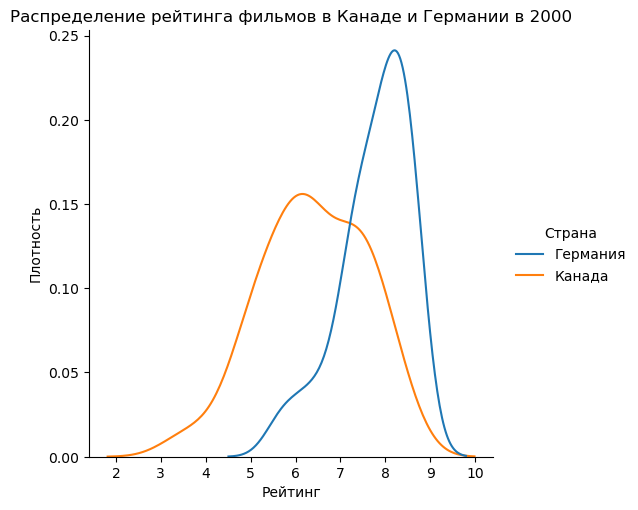

In [26]:
sns.displot(data=Canada_Germany, x='Рейтинг', hue='Страна',kind='kde')
plt.ylabel("Плотность")
plt.title('Распределение рейтинга фильмов в Канаде и Германии в 2000')

Из построенного графика можно легко наблюдать несхожесть распределений рейтинга в двух странах. Соответсвенно, определённо нужно воспользоваться непараметрическим тестом. На просторах интернета мы вычитали, что одним из таких тестов, который бы сравнивал дисперсии двух независимых выборок, является тест Левена.

In [15]:
statistic_ratio=sts.levene(Canada_Germany[Canada_Germany['Страна']=='Канада']['Рейтинг'],
           Canada_Germany[Canada_Germany['Страна']=='Германия']['Рейтинг']) #по дефолту считает двустороннее p-value
statistic_p_value = statistic_ratio[1]/2
statistic_p_value

0.0021960853217632896

In [16]:
if statistic_p_value < 0.05:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не отвергаем нулевую гипотезу.")

Отвергаем нулевую гипотезу.


__Вывод:__

Нулевая гипотеза отвергается, что не удивительно, если посмотреть на график, на котором заметно, что разброс рейтинга в Канаде больше, чем в Германии. Следовательно, можно предположить, что немецкие фильмы, как правило, высококачесвенные и более популярные среди аудитории ИВИ, поэтому они чаще всего высоко оцениваются. Однако про Канаду можно заметить, что их кинематограф в одинаковой степени как нравится, так и нет потребителям. Полагаем, в этой стране есть и хорошо снятые фильмы, и не очень; но большая часть среднего качества (больше оценок 6).

## Гипотеза №4:                                              👶🏻|🔞

Для тестирования данной гипотезы по-прежнему подбирались выборки схожей размерности.

In [38]:
len(df[df['Возрастное ограничение']==18])

353

In [39]:
len(df[df['Возрастное ограничение']==12])

406

Приступим к тестированию следующей гипотезы: средняя продолжительность фильмов во всех странах для возрастного ограничения 12+ имеет то же значение, что и для 18+. 
$$
\begin{aligned}
& H_0: \mu_{12+} = \mu_{18+} \\
& H_1: \mu_{12+} < \mu_{18+}
\end{aligned}
$$

Первоначально исследуем распределения продолжительностей фильмов для представленных возрастных категорий.

In [17]:
restriction_12_18=df[(df['Возрастное ограничение']==18)|(df['Возрастное ограничение']==12)]
restriction_12_18

,Название,Страна,Жанр,Год выпуска,Давность,Возрастное ограничение,Категория,Продолжительность,Рейтинг
1,Беспринципные в деревне,Россия,Комедии,2023,0,18,Взрослое,86,7.2
2,Нюрнберг,Россия,Драмы,2023,0,12,Подростковое,124,8.1
3,Моё прекрасное несчастье,США,Комедии,2023,0,18,Взрослое,91,7.7
4,Взломщик,США,Криминал,2023,0,18,Взрослое,91,6.5
6,Эскортница,Россия,Драмы,2023,0,18,Взрослое,90,6.3
...,...,...,...,...,...,...,...,...,...
2049,Вальгалла: Рагнарёк,Дания,Фэнтези,2019,4,12,Подростковое,100,5.8
2050,Хакеры,США,Триллеры,1995,28,12,Подростковое,105,7.9
2053,Безумная дорога,Австралия,Ужасы,2021,2,18,Взрослое,87,5.5
2054,Восход,Австралия,Драмы,2014,9,12,Подростковое,102,6.7


Text(0.5, 1.0, 'Распределение продолжительности фильмов категории 12+ и 18+')

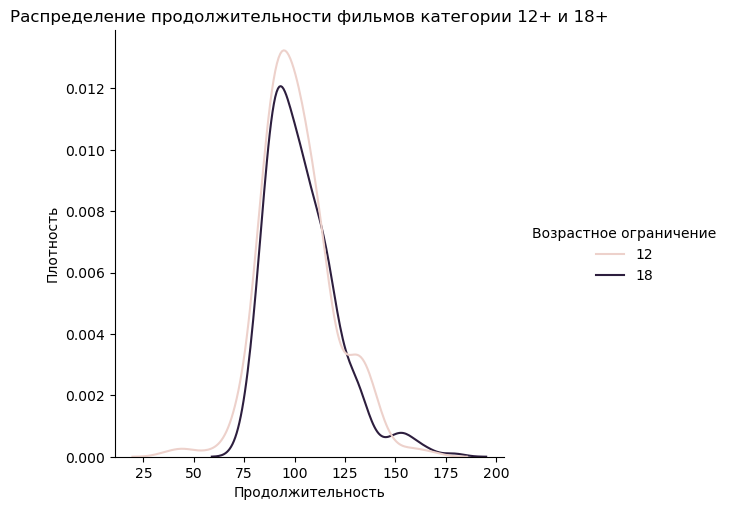

In [27]:
sns.displot(data=restriction_12_18, x='Продолжительность', hue='Возрастное ограничение',kind='kde')
plt.ylabel("Плотность")
plt.title('Распределение продолжительности фильмов категории 12+ и 18+')

Обратим внимание, что распределение продолжительности фильмов по возрастному ограничению похоже на нормальное со средним 100 мин. Поэтому можем снова воспользоваться односторонней t-статистикой, поскольку все её предпосылки соблюдаются.

__Предпосылки:__
1. Выборки независимы (продолжительность фильмов 12+ не влияет на продолжительность фильмов 18+)
2. Данные в выборке имеют нормальное распределение (как мы уже заметили выше)
3. Дисперсии двух выборок между собой примерно равны (опираясь на график)
4. Явные выбросы отсутствуют (но нельзя их полностью исключить, так как есть некоторые выбивающиеся значения для 12+)

In [19]:
statistic_ages=sts.ttest_ind(restriction_12_18[restriction_12_18['Возрастное ограничение']==12]['Продолжительность'],
              restriction_12_18[restriction_12_18['Возрастное ограничение']==18]['Продолжительность'],alternative='less')
statistic_ages

Ttest_indResult(statistic=-1.590278442169472, pvalue=0.05609478158434761)

In [20]:
statistic_ages[1]>0.05

True

__Вывод:__

Получается, что нулевая гипотеза не отвергается, а следовательно средняя продолжительность фильмов для детей (12+) примерно равна длительности фильмов для взрослых (18+). Однако мы можем заметить, что p-value не сильно больше критического значения (0.05), а значит возможно, что при большем объеме выборки основная гипотеза может быть отвергнута в пользу альтернативной. \
Изначально мы предполагали, что кино для детей длится меньше, чем для взрослых, так как детям трудно воспринимать долгие фильмы. Однако, с учетом объема собранных данных, оказалось, что они примерно равны. 

## Гипотеза №5:  Умели ведь раньше!!!

Мы предполагаем, что более старые фильмы имеют средний рейтинг выше, чем современные, что в принципе мы наблюдали на графике динамики рейтинга за весь период во всём мире в части EDA. Разделение данных на две части по границе 2016 обусловлено тем, что выборки полученных периодов примерно равны по объёму.

In [40]:
len(df[df['Год выпуска'] <= 2016])

1064

In [41]:
len(df[df['Год выпуска'] > 2016])

997

Далее проверим гипотезу: средний рейтинг фильмов, выпущенных до 2016гг., равен среднему после 2016г. 
$$
\begin{aligned}
& H_0: \mu_{до \ 2016} = \mu_{после\ 2016} \\
& H_1: \mu_{до \ 2016} \neq \mu_{после\ 2016}
\end{aligned}
$$

И вновь изобразим распределение рейтинга фильмов, подразделяемые по рассматриваемым периодам. После чего важно заметить, что у нас двусторонняя гипотеза, что будет иметь важное значение при определении статистики для проверки гипотезы.

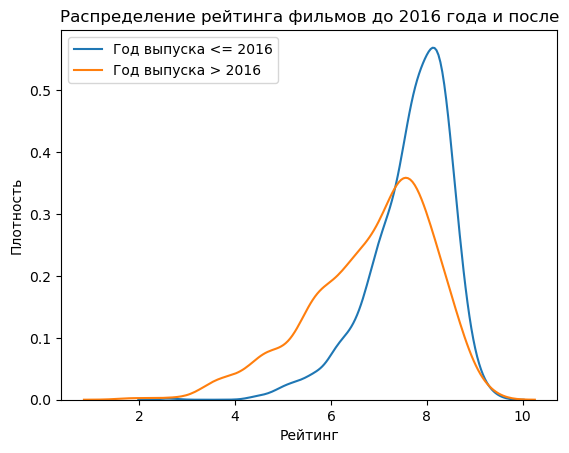

In [28]:
sns.kdeplot(data=df[df['Год выпуска'] <= 2016]['Рейтинг'], label='Год выпуска <= 2016')
sns.kdeplot(data=df[df['Год выпуска'] > 2016]['Рейтинг'], label='Год выпуска > 2016')

plt.xlabel('Рейтинг')
plt.ylabel('Плотность')
plt.title('Распределение рейтинга фильмов до 2016 года и после')

plt.legend()
plt.show()

Из графика выше видно, что значения Рейтинга после 2016 и до него подчинены закону не нормального распределения, соответственно применяем непараметрические тесты. На этот раз мы решили использовать тест Манна-Уитни, опираясь на похожую формулировку гипотезы из семинара 12. Можем обосновать свой выбор такими допущениями как:

__Предпосылки:__
1. Независимость наблюдений (рейтинги в одном периоде никак не могут изменить рейтинги в другом)
2. Данные распределены не нормально, но имеют похожую форму (из графика выше у 2-х выборок наблюдается скошенность вправо)
3. Не требует равенства дисперсий 

In [22]:
statistic_2016=sts.mannwhitneyu(df[df['Год выпуска'] <= 2016]['Рейтинг'],df[df['Год выпуска'] > 2016]['Рейтинг'])
statistic_2016

MannwhitneyuResult(statistic=740275.5, pvalue=1.5094548334077193e-54)

In [23]:
if statistic_2016[1] < 0.05:
    print("Отвергаем нулевую гипотезу. Средние значения не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние значения равны.")

Отвергаем нулевую гипотезу. Средние значения не равны.


__Вывод:__

Результат тестирования гипотезы был еще заметен на этапе визуализации, потому что заметно, что фильмы, выпущенные до 2016 года в больших случаях получают рейтинг 6-9, чем фильмы после указанного года. Это может навести на мысль, что средний рейтинг кинопроектов до 2016 больше, чем после 2016, в котором присутствует уже существенно большее кол-во фильмов с низким рейтингом. Мы изначально, формулируя эту гипотезу, исходили из того, что в последнее время качество и сюжет фильмов испортился, поэтому относительно не новое кино оценивается аудиторией выше, чем современное, что в принципе подтвердилось.